# Chapter 2
## Multiarmed bandits 🐙 🎰 🎰 🎰 🎰 🎰 
This chapter presents multiarmed bandit problems, which can be seen as a
simple (perhaps the simplest) case of the RL problem. We say it is simple
because the state space contains only one single state. Since the environment
can be only in one state, there is no state transitions at all. In the L-armed
Bandit Problem (so named by analogy to a slot machine) the agent can
choose between L possible actions. You can think of the following analogy:
you are in a casino with a bag of coins and there is a row of L slot machines,
your goal is to decide a strategy in the form of to which machine you play
each coin of the bag in order to maximize the return, where the prize of each
machine follows its own unknown stationary probability distribution.

# Exercise 2.1.

*(Complete the Matlab code provided by the instructor in script
exercise_2_1.m.)* In this scenario a **two-armed bandit** starts form the worst
machine and remains in this machine until the **ε-greedy** condition is verified.
This condition may occur only in deterministic samples (25,50,100) in order
to facilitate the programming debugging. In case we change the machine
to the best one, a slope change is perfectly visible. See an example in the last
figure.

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We define the class Bandit:

In [60]:
class Bandit:
    """ Bandit class with parameters mean and standard deviation 
        for the normal distribution where we sample """
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def sample(self, n=None):
        return np.random.normal(self.mean,self.std, n )

We define the parameters of our experiment:

In [61]:
N_bandits = 2 # Number of bandits in our problem
eps = 0.1 # epsilon for the e-greedy.
n_runs = 100 # number of runs

For this general problem we define specific means and std.

In [62]:
means = [10,30]
std = [0,0]

Then we create both bandits.

In [63]:
L_armed_bandit = []
for i in range(N_bandits):
    L_armed_bandit.append(Bandit(means[i],std[i]))

Now we run the experiment with the optimal policy, the worst policy and the scenary where e-greedy condition comes in at [25,50,75].

In [64]:
worst_run = L_armed_bandit[0].sample(n_runs) #worst run
best_run = L_armed_bandit[1].sample(n_runs) #best run

agent_run = [] #our agent's run
q = [10,0] # We start with the worst bandit 

for t in range(n_runs):
    i_bandit = np.argmax(q) # Greedy choice
    eps_t = 0.5 #the standard epsilon we sample, we keep it over 0.1 to make it simpler
    if t in [25,50,75]:
        eps_t = 0.05 # in t=[25,50,75] we change epsilon to under 0.1
        
    if eps_t < eps : #when the epsilon is under the threshold we explore
        other_actions = []
        other_actions = [action for action in range(len(q)) if action != i_bandit] #from the other actions
        i_bandit = np.random.choice(other_actions) # We choose one
    
    reward = L_armed_bandit[i_bandit].sample() # We sample the reward from that bandit
    q[i_bandit] = reward # Update the Q function
    agent_run.append(reward) # Add the reward obtained to our history

And now we plot the runs:

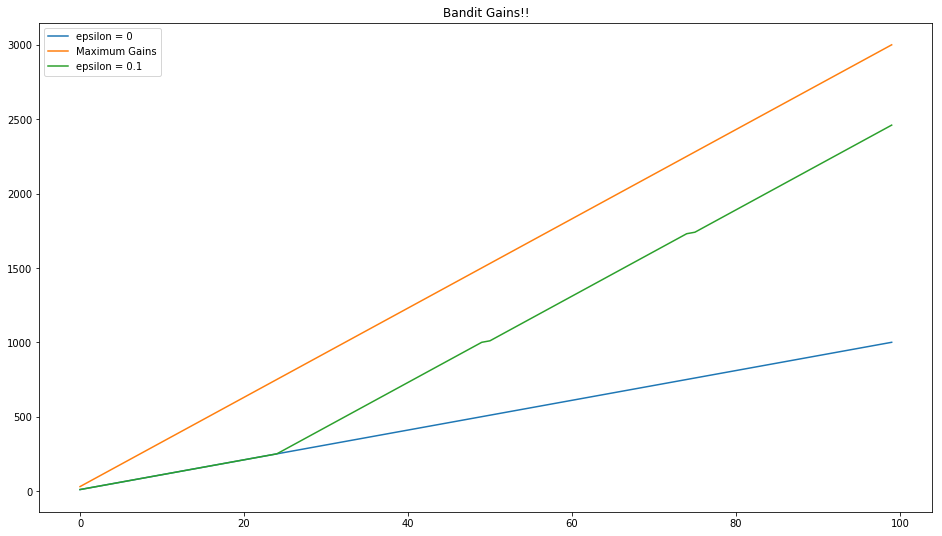

In [77]:
plt.figure(figsize=(16, 9))
plt.title('Bandit Gains!!')
plt.plot(np.cumsum(worst_run),label = 'epsilon = 0')
plt.plot(np.cumsum(best_run),label = 'Maximum Gains')
plt.plot(np.cumsum(agent_run),label = 'epsilon = 0.1')
plt.legend()